In [79]:
!pip install -r requirements.txt

# 1. import dependancies

In [75]:
import pandas as pd #alias
import openai, groq 
import numpy as np #alias
from enum import Enum
from dotenv import load_dotenv
from pydantic import BaseModel # helps to create a class with a string type and a enum type, provdide the strucutre and extract the output 
import seaborn as sns
from dotenv import load_dotenv

load_dotenv()

True

# 2. basic information

In [11]:
df = pd.read_csv('raw\CEHHbInToW.csv')
df.head(15)

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Jack,Smith,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Carol,Wilson,822,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Grace,Wilson,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,Hank,Jones,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,Eva,Wilson,684,France,Male,27.0,2,134603.88,1,1,1,71725.73,0


NaN = not a number

In [13]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                600
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

# 3. Handle missing values

## 3.1 Deletion

In [19]:
df_copy = df.copy()
df_copy = df_copy.dropna(axis=1) 
df_copy.head(15)

# axis = 0 (check each row and drop if atleast 1 null value consits of)
# axis = 1 (check each column and drop if atleast 1 null value consits of)

# dropna(axis=1) = drop columns with atleast 1 null value
# dropna(axis=0) = drop rows with atleast 1 null value

# dropna(axis=1, how='all') = drop columns with all null values
# dropna(axis=0, how='all') = drop rows with all null values

# dropna(axis=1, how='any') = drop columns with any null values

,RowNumber,CustomerId,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,2,125510.82,1,1,1,79084.10,0
5,6,15574012,645,Spain,8,113755.78,2,1,0,149756.71,1
6,7,15592531,822,France,7,0.00,2,1,1,10062.80,0
7,8,15656148,376,Germany,4,115046.74,4,1,0,119346.88,1
8,9,15792365,501,France,4,142051.07,2,0,1,74940.50,0
9,10,15592389,684,France,2,134603.88,1,1,1,71725.73,0


## 3.2.1 Age

In [20]:
mean = df['Age'].mean()
median = df['Age'].median()
mean = round(mean, 2)

print(f"Mean | Age : {mean}")
print(f"Median | Age : {median}")

Mean | Age : 38.91
Median | Age : 37.0


<Axes: xlabel='Age', ylabel='Count'>

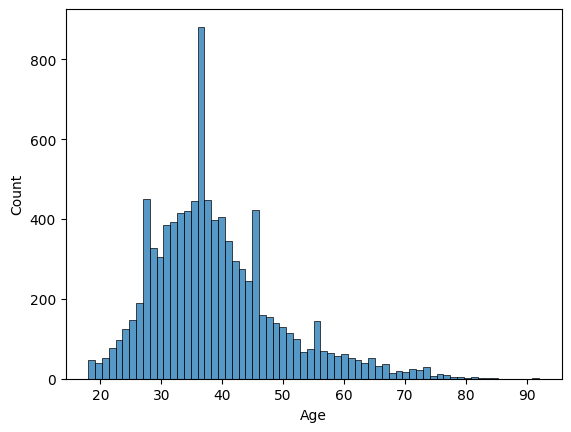

In [24]:
sns.histplot(df['Age'])

In [27]:
df_impute = df.copy()

In [30]:
df_impute.loc[:, 'Age'] = df_impute['Age'].fillna(mean)
df_impute

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Grace,Garcia,771,France,Male,39.00,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Jack,Garcia,516,France,Male,35.00,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Carol,Johnson,709,France,Female,36.00,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Jack,Garcia,772,Germany,Male,42.00,3,75075.31,2,1,0,92888.52,1


In [32]:
df_impute.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

## 3.2.2 Gender

In [76]:
class Gender(str, Enum):
    MALE = 'male'
    FEMALE = 'female'

class GenderPrediction(BaseModel):   #structuerd outputs from an LLM
    firstname: str
    lastname: str
    pred_gender: Gender

def predict_gender(
        firstname: str,
        lastname: str
        ):
    
    prompt = f"""
                what is the most likely gender (male or female) for someone with the first name '{firstname}' 
                and the last name '{lastname}' ?

                your resposne only consists of one word: male or female

                """
    
    response = groq.Groq().chat.completions.create(
                                                    model="llama-3.3-70b-versatile",
                                                    messages=[{
                                                            "role" : "user",
                                                            "content" : prompt
                                                    }]
                                                )
    
    predict_gender = response.choices[0].message.content.strip()
    return predict_gender

In [77]:
predict_gender("Dineth", "Nethusahan")

'Male'

In [78]:
predict_gender(firstname=str, lastname=str)

'Male'